In [4]:
import kagglehub
import pandas as pd

path = kagglehub.dataset_download("uciml/adult-census-income")
dataset_path = "/root/.cache/kagglehub/datasets/uciml/adult-census-income/versions/3/adult.csv"
df = pd.read_csv(dataset_path)
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [7]:
df.isnull().sum()

,0
age,0
workclass,0
fnlwgt,0
education,0
education.num,0
marital.status,0
occupation,0
relationship,0
race,0
sex,0


2. Visualisation

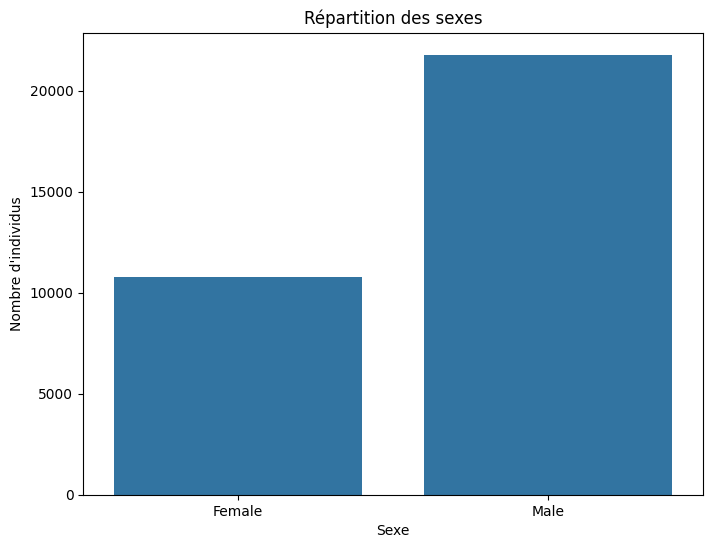

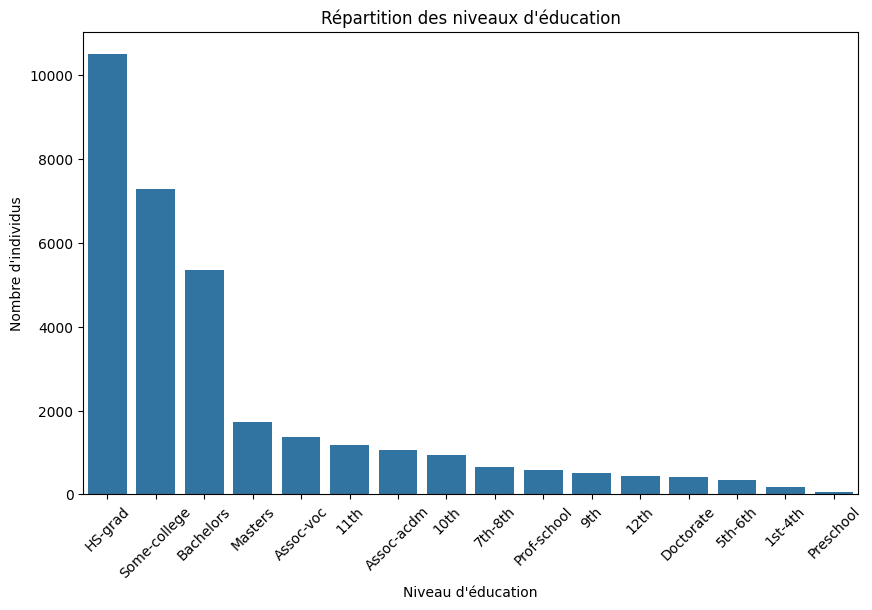

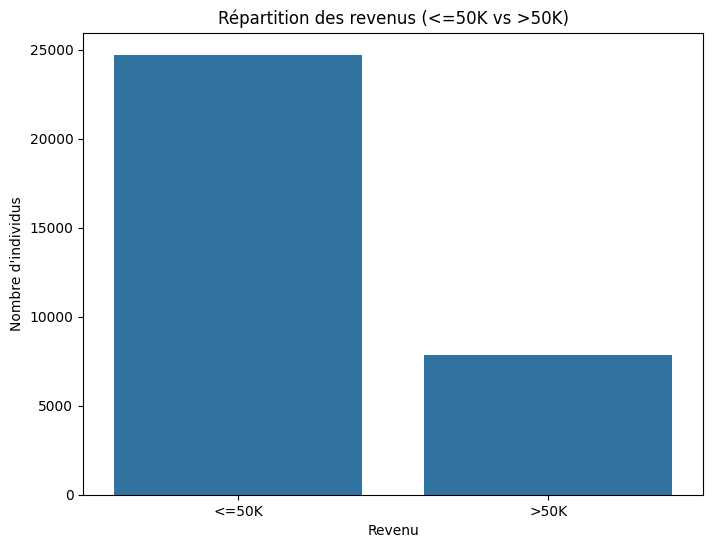

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualisation de la distribution du sexe
plt.figure(figsize=(8, 6))
sns.countplot(x='sex', data=df)
plt.title("Répartition des sexes")
plt.xlabel("Sexe")
plt.ylabel("Nombre d'individus")
plt.show()

# Visualisation de la distribution des niveaux d'éducation
plt.figure(figsize=(10, 6))
sns.countplot(x='education', data=df, order=df['education'].value_counts().index)
plt.title("Répartition des niveaux d'éducation")
plt.xlabel("Niveau d'éducation")
plt.ylabel("Nombre d'individus")
plt.xticks(rotation=45)  # Faire pivoter les labels pour mieux les lire
plt.show()

# Visualisation de la distribution des revenus
plt.figure(figsize=(8, 6))
sns.countplot(x='income', data=df)
plt.title("Répartition des revenus (<=50K vs >50K)")
plt.xlabel("Revenu")
plt.ylabel("Nombre d'individus")
plt.show()


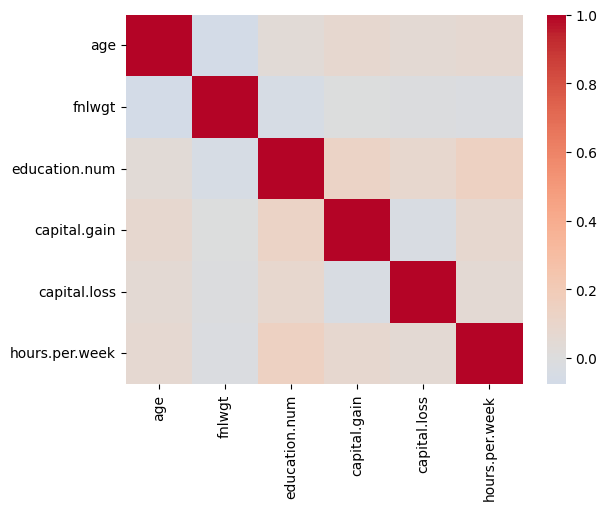

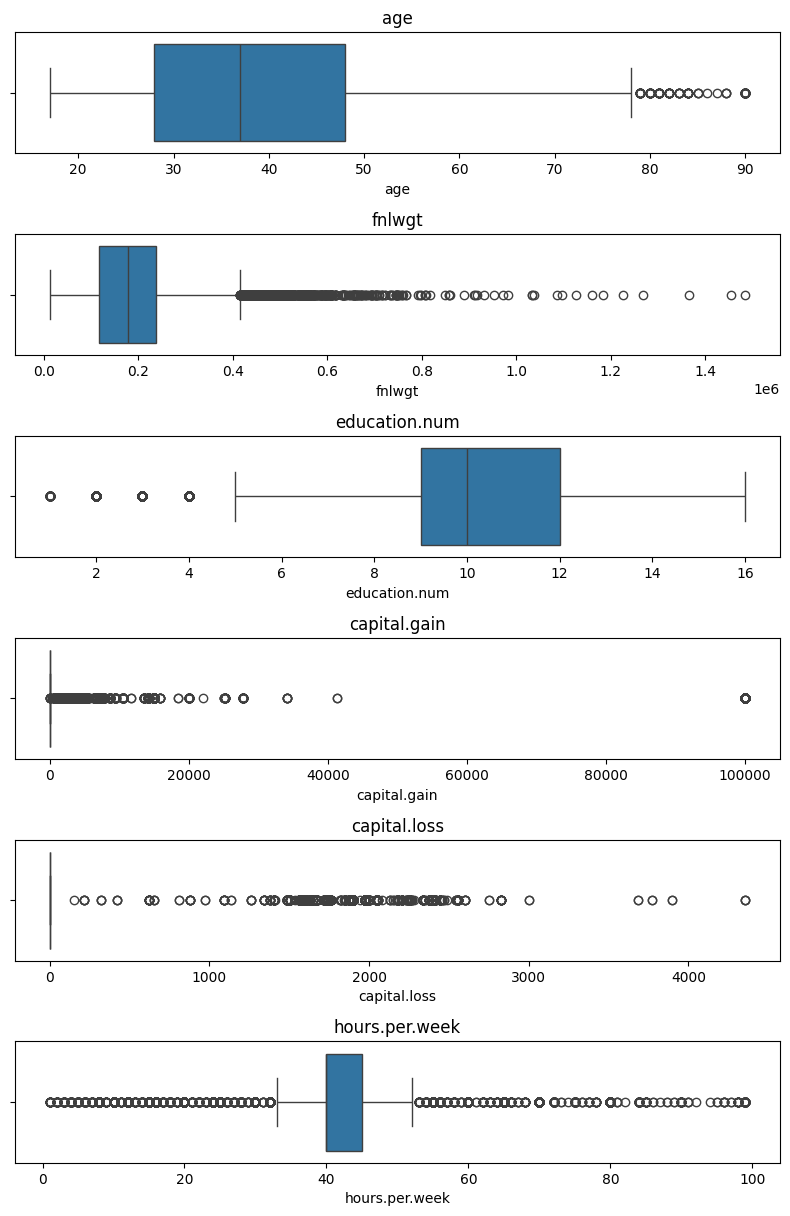

,count,unique,top,freq,mean,std,min,25%,50%,75%,max,NAN,% NAN,Duplicated,% Duplicated,Uniques
age,32561.000000,nan,nan,nan,38.581647,13.640433,17.000000,28.000000,37.000000,48.000000,90.000000,NON,0.000000,OUI,99.775805,73
workclass,32561,9,Private,22696,nan,nan,nan,nan,nan,nan,nan,NON,0.000000,OUI,99.972360,9
fnlwgt,32561.000000,nan,nan,nan,189778.366512,105549.977697,12285.000000,117827.000000,178356.000000,237051.000000,1484705.000000,NON,0.000000,OUI,33.515555,21648
education,32561,16,HS-grad,10501,nan,nan,nan,nan,nan,nan,nan,NON,0.000000,OUI,99.950861,16
education.num,32561.000000,nan,nan,nan,10.080679,2.572720,1.000000,9.000000,10.000000,12.000000,16.000000,NON,0.000000,OUI,99.950861,16
marital.status,32561,7,Married-civ-spouse,14976,nan,nan,nan,nan,nan,nan,nan,NON,0.000000,OUI,99.978502,7
occupation,32561,15,Prof-specialty,4140,nan,nan,nan,nan,nan,nan,nan,NON,0.000000,OUI,99.953933,15
relationship,32561,6,Husband,13193,nan,nan,nan,nan,nan,nan,nan,NON,0.000000,OUI,99.981573,6
race,32561,5,White,27816,nan,nan,nan,nan,nan,nan,nan,NON,0.000000,OUI,99.984644,5
sex,32561,2,Male,21790,nan,nan,nan,nan,nan,nan,nan,NON,0.000000,OUI,99.993858,2


In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

def get_summary(df) :

# 1) Calcul statistiques de base grâce à .describe()
    df_final = df.describe(include='all').T

# 2) Affichage des valeurs nulles sur une colonne.
    df_final['NAN'] = df.apply(lambda x: 'OUI' if pd.isna(x).any() else 'NON')

# 3) Calcul % de valeurs nulles : application d'un lambda pour calculer le pourcentage.
    df_final['% NAN'] = df.apply(lambda x : (x.isna().sum() / len(x))*100)

# 4) Affichage des valeurs en doublons sur une colonne.
    df_final['Duplicated'] = df.apply(lambda x: 'OUI' if x.duplicated().any() else 'NON')

# 5) Calcul % de valeurs en doublons : application d'un lambda pour calculer le pourcentage.
    df_final['% Duplicated'] = df.apply(lambda x : (x.duplicated().sum() / len(x))*100)

# 6) Calcul nombre de valeurs uniques : application d'un lambda pour calculer le nombre de valeurs uniques.
    df_final['Uniques'] = df.apply(lambda x : len(x.unique()))

# 7) Création de la heatmap.
    df_num = df.select_dtypes(include = 'number')
    if not df_num.empty:
        sns.heatmap(df_num.corr(), cmap="coolwarm", center=0)
        plt.show()

# 9) Affichage des boxplots de toutes les valeurs numériques.
    # On commence par récupérer les colonnes avec des valeurs numériques (int, float)
    col_num = df.select_dtypes(include=['int', 'float'])

    # On crée une boucle qui crée un graphique global contenant un sous-graphique de type boxplot pour chaque colonne numérique.
    plt.figure(figsize=(8, 30))

    for i, colonne in enumerate(col_num, 1):
        plt.subplot(len(df.columns), 1, i)
        sns.boxplot(x=df[colonne])
        plt.title(colonne)

    plt.tight_layout()
    plt.show()

# 10) Affichage des cellules en rouge.
    df_final = df_final.style.apply(lambda column : ['background : red' if value > 0 else '' for value in column], subset=['% NAN', '% Duplicated'])

    return df_final
get_summary(df)

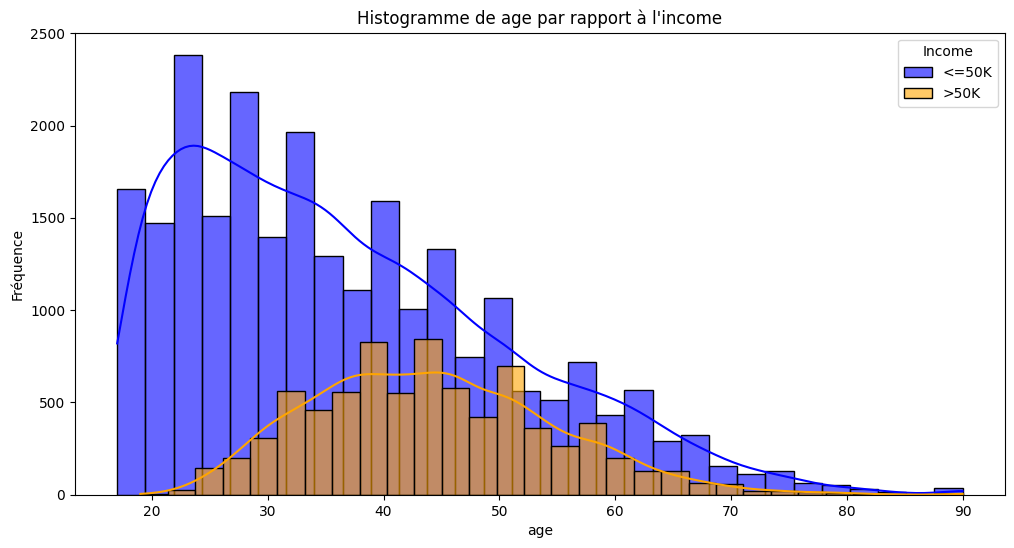

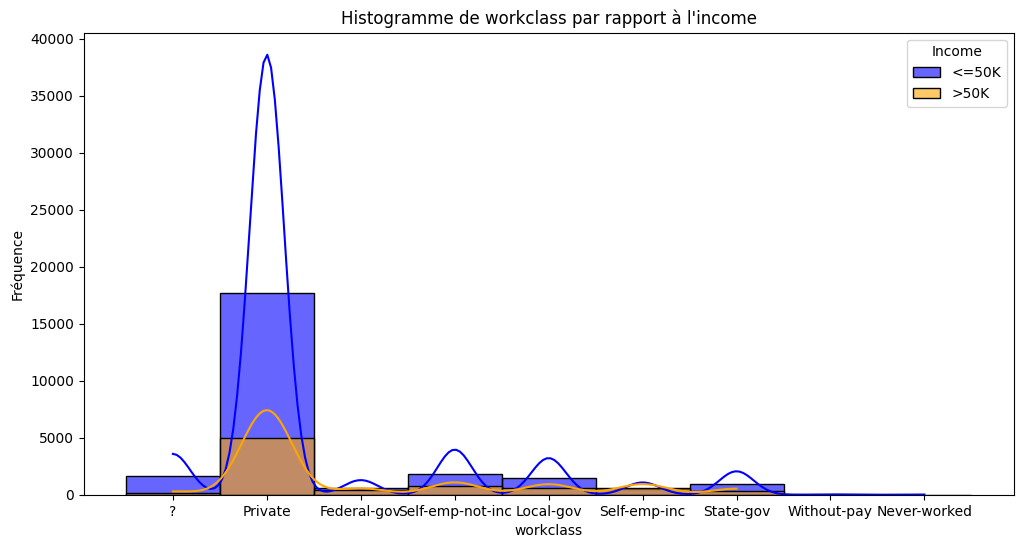

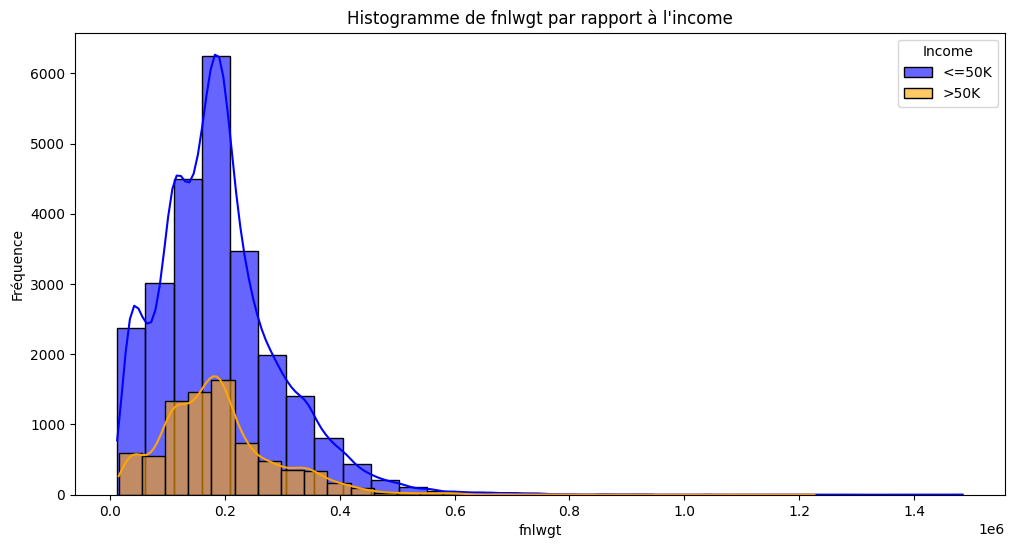

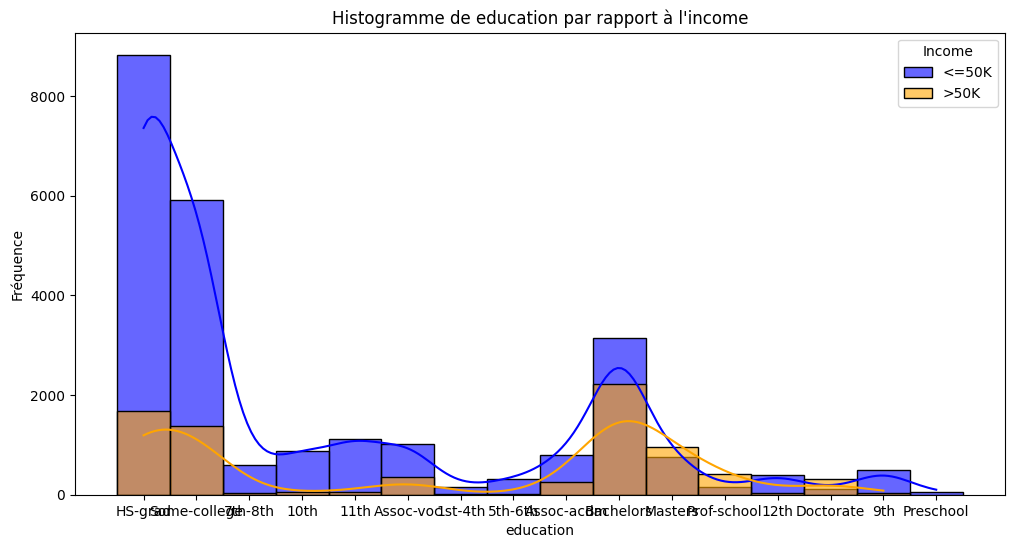

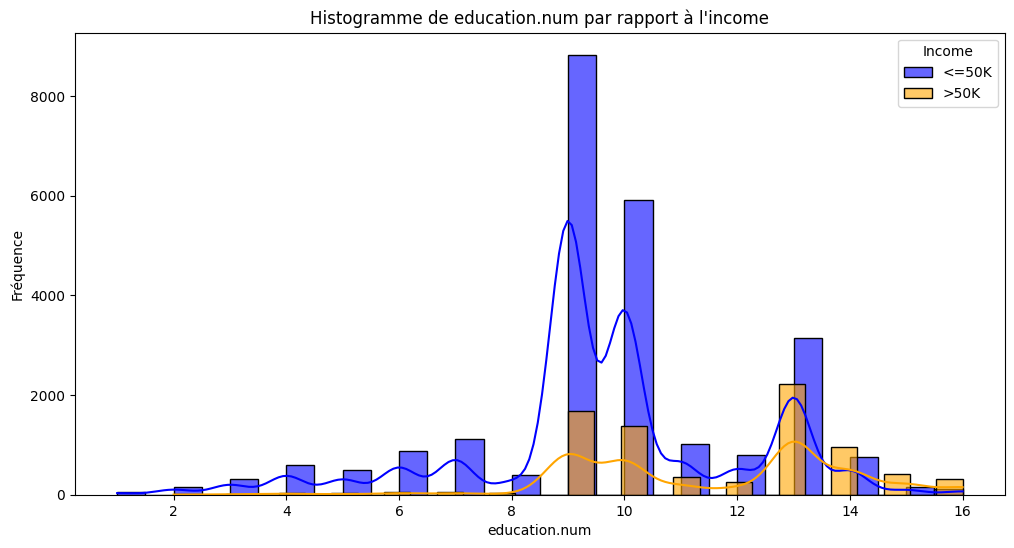

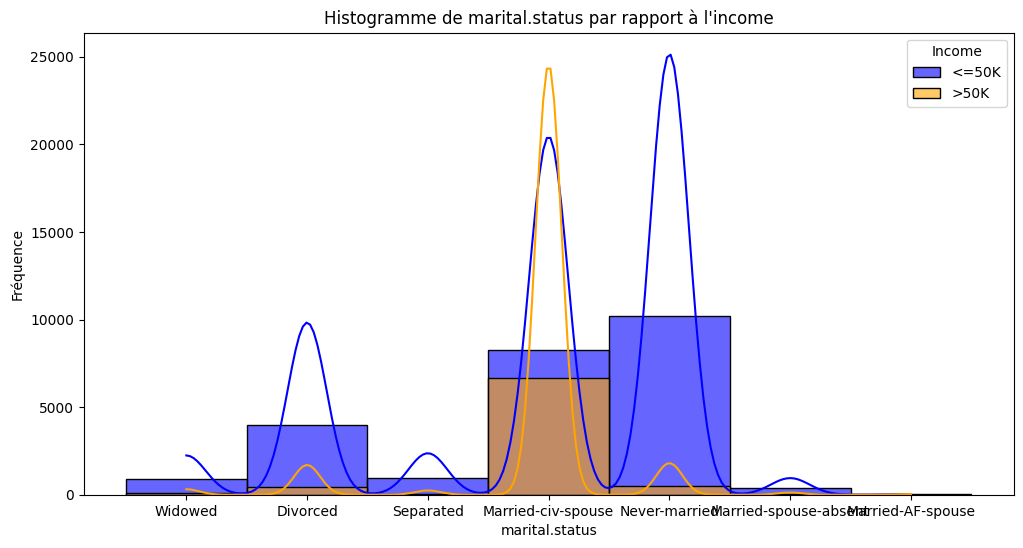

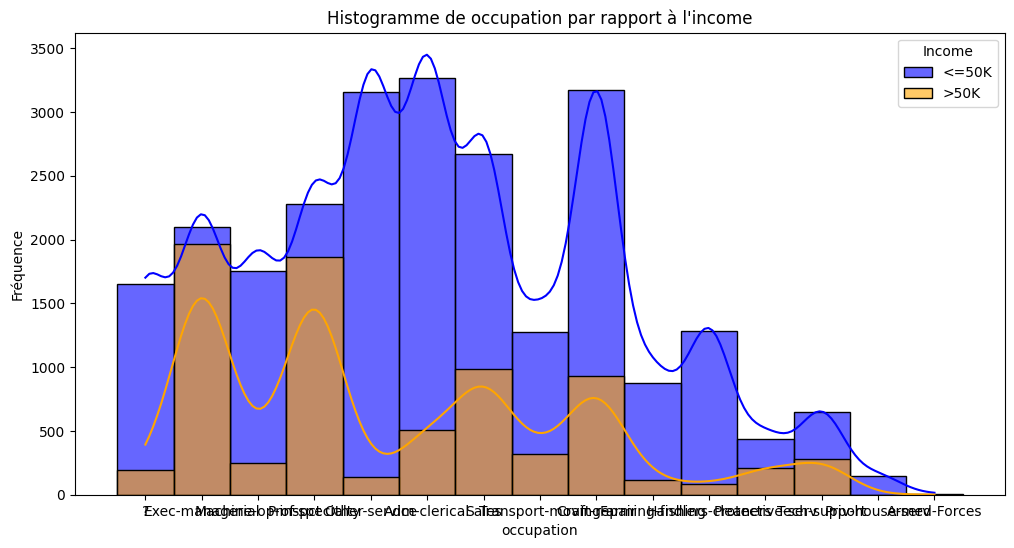

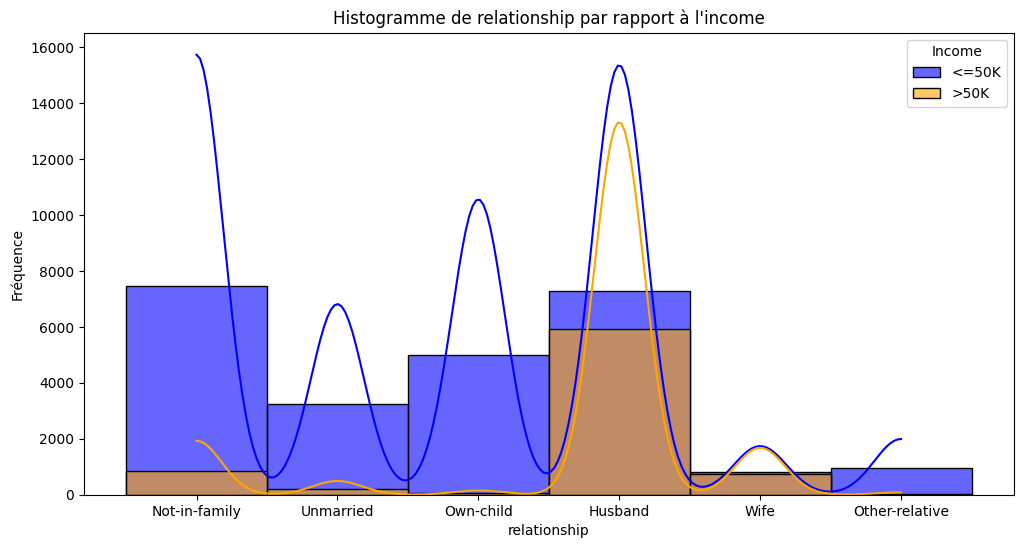

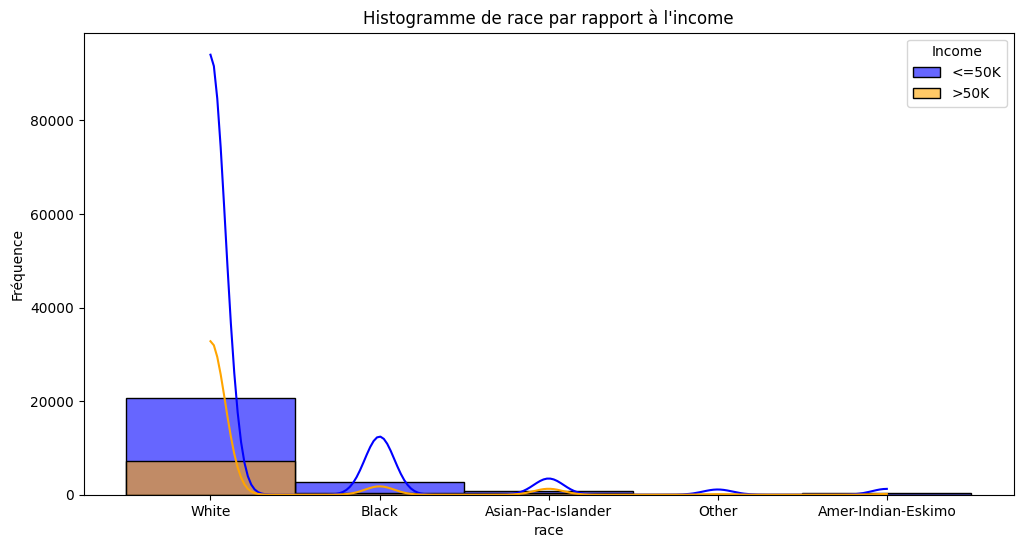

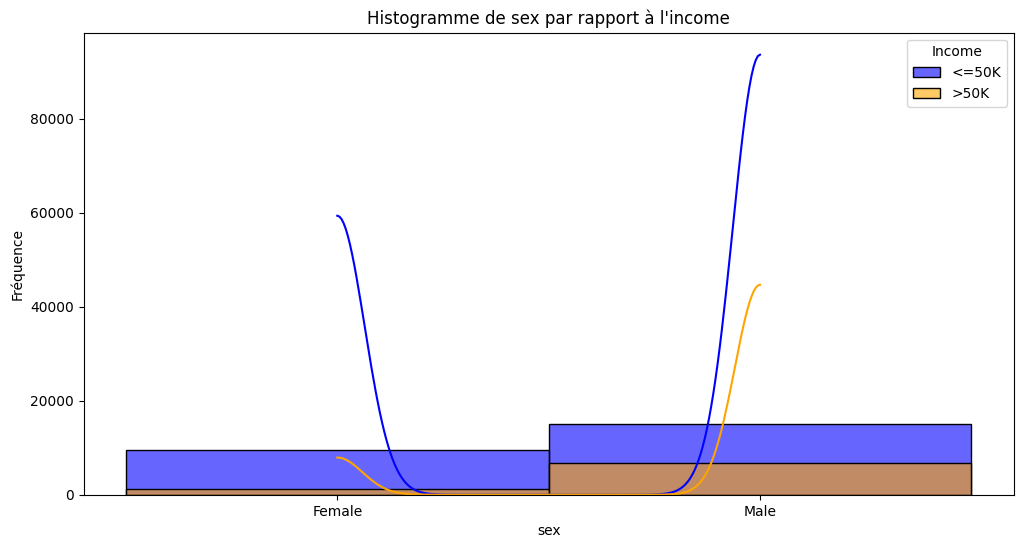

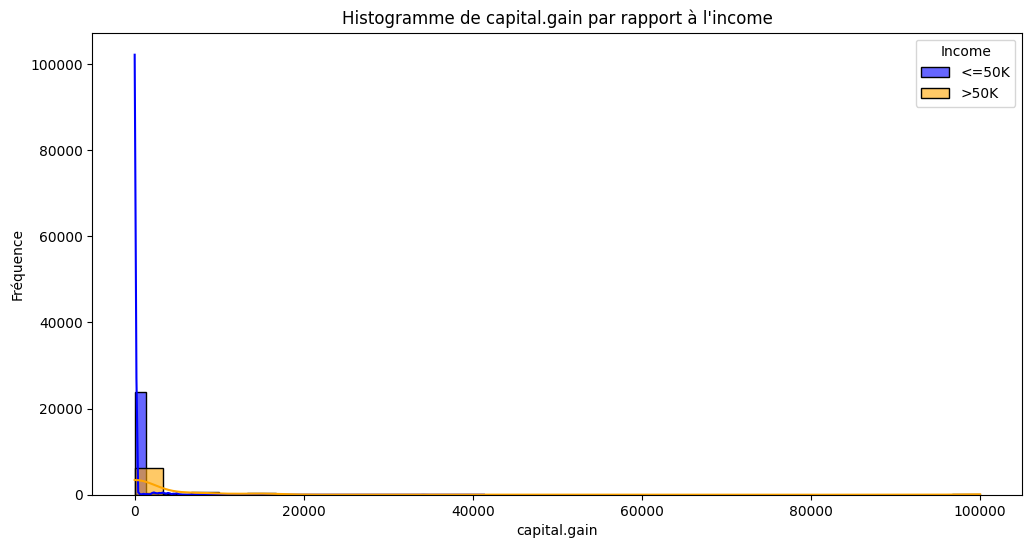

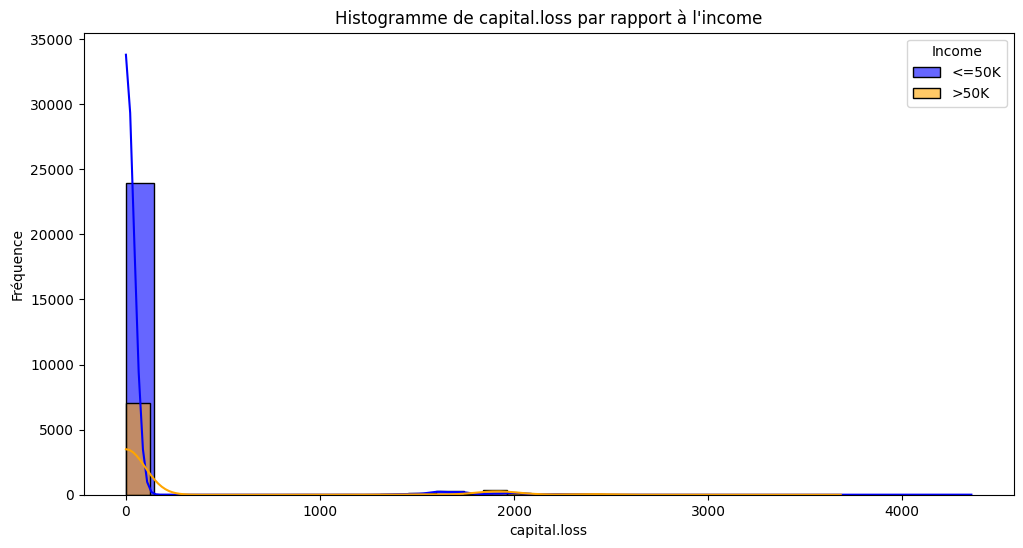

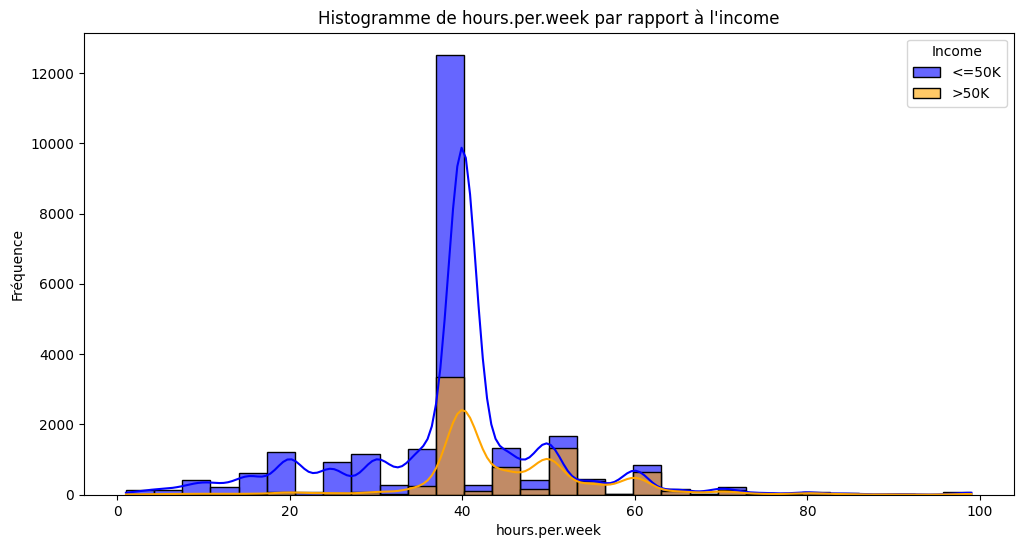

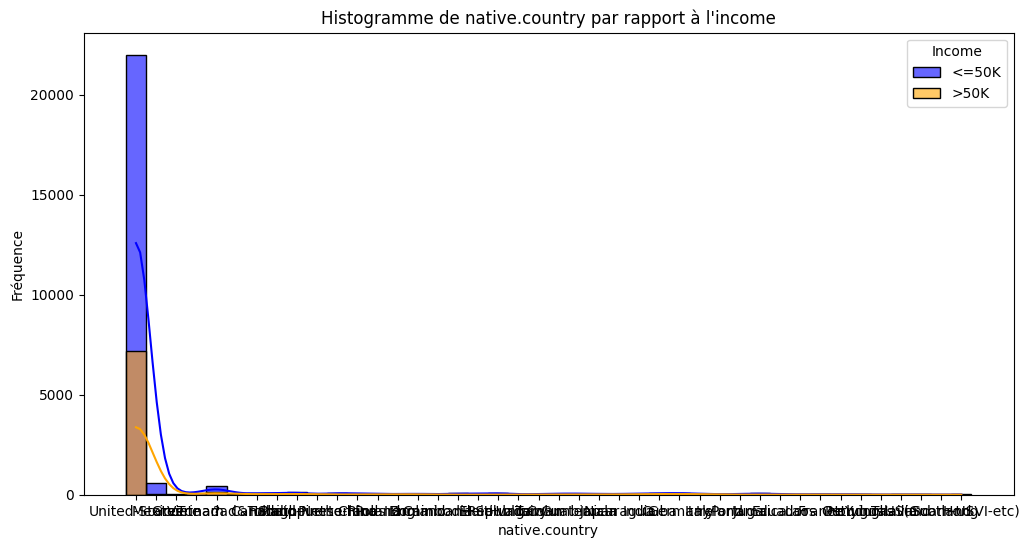

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Supposons que votre DataFrame s'appelle df et que la colonne 'income' est votre variable cible
# Exemple de chargement de données (à adapter selon votre source de données)
# df = pd.read_csv('votre_fichier.csv')

# Créer des histogrammes côte à côte pour chaque colonne par rapport à 'income'
for column in df.columns:
    if column != 'income':
        plt.figure(figsize=(12, 6))

        # Créer un histogramme pour chaque catégorie de 'income'
        sns.histplot(data=df[df['income'] == '<=50K'], x=column, color='blue', label='<=50K', kde=True, bins=30, alpha=0.6)
        sns.histplot(data=df[df['income'] == '>50K'], x=column, color='orange', label='>50K', kde=True, bins=30, alpha=0.6)

        plt.title(f'Histogramme de {column} par rapport à l\'income')
        plt.xlabel(column)
        plt.ylabel('Fréquence')
        plt.legend(title='Income')
        plt.show()

ETAPE 3

In [11]:
# Calcul du pourcentage d'individus gagnant plus de 50K par sexe
sex_income = df.groupby('sex')['income'].value_counts(normalize=True).unstack()
sex_income['>50K_percentage'] = sex_income['>50K'] * 100
print(sex_income[['>50K_percentage']])


income  >50K_percentage
sex                    
Female        10.946059
Male          30.573658


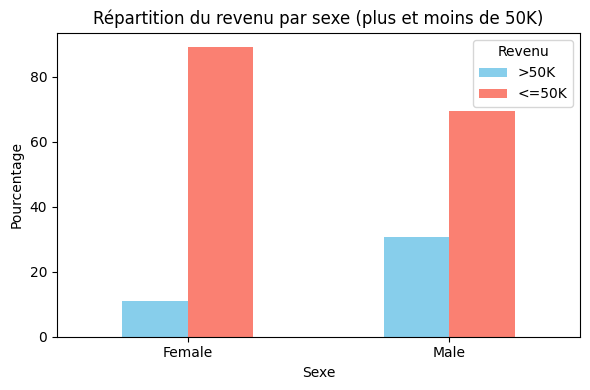

In [18]:
import matplotlib.pyplot as plt

# Calcul du pourcentage d'individus gagnant plus et moins de 50K par sexe
sex_income = df.groupby('sex')['income'].value_counts(normalize=True).unstack()
sex_income['>50K_percentage'] = sex_income['>50K'] * 100
sex_income['<=50K_percentage'] = sex_income['<=50K'] * 100

# Tracer le graphique à barres groupées
ax = sex_income[['>50K_percentage', '<=50K_percentage']].plot(kind='bar', stacked=False, color=['skyblue', 'salmon'], figsize=(6, 4))

plt.title("Répartition du revenu par sexe (plus et moins de 50K)")
plt.ylabel("Pourcentage")
plt.xlabel("Sexe")
plt.xticks(rotation=0)
plt.legend(title='Revenu', labels=['>50K', '<=50K'])
plt.tight_layout()
plt.show()


In [12]:
# Calcul du pourcentage d'individus gagnant plus de 50K par niveau d'éducation
education_income = df.groupby('education')['income'].value_counts(normalize=True).unstack()
education_income['>50K_percentage'] = education_income['>50K'] * 100
print(education_income[['>50K_percentage']])


income        >50K_percentage
education                    
10th                 6.645230
11th                 5.106383
12th                 7.621247
1st-4th              3.571429
5th-6th              4.804805
7th-8th              6.191950
9th                  5.252918
Assoc-acdm          24.835989
Assoc-voc           26.121563
Bachelors           41.475257
Doctorate           74.092010
HS-grad             15.950862
Masters             55.658735
Preschool                 NaN
Prof-school         73.437500
Some-college        19.023454


In [13]:
# Calcul du pourcentage d'individus gagnant plus de 50K par occupation
occupation_income = df.groupby('occupation')['income'].value_counts(normalize=True).unstack()
occupation_income['>50K_percentage'] = occupation_income['>50K'] * 100
print(occupation_income[['>50K_percentage']])


income             >50K_percentage
occupation                        
?                        10.363538
Adm-clerical             13.448276
Armed-Forces             11.111111
Craft-repair             22.664064
Exec-managerial          48.401377
Farming-fishing          11.569416
Handlers-cleaners         6.277372
Machine-op-inspct        12.487512
Other-service             4.157815
Priv-house-serv           0.671141
Prof-specialty           44.903382
Protective-serv          32.511556
Sales                    26.931507
Tech-support             30.495690
Transport-moving         20.037570


In [25]:
# Créer une nouvelle colonne 'hours_range' pour les tranches horaires
df['hours_range'] = pd.cut(df['hours.per.week'], bins=range(0, 101, 10), right=False, labels=['{}-{}'.format(i, i+10) for i in range(0, 100, 10)])

# Calcul du pourcentage d'individus gagnant plus ou moins de 50K par tranche d'heures travaillées par semaine
hours_income = df.groupby('hours_range')['income'].value_counts(normalize=True).unstack().fillna(0)

# Calcul du pourcentage d'individus gagnant plus de 50K
hours_income['>50K_percentage'] = hours_income['>50K'] * 100
hours_income['<=50K_percentage'] = hours_income['<=50K'] * 100

# Affichage des résultats
result = hours_income[['>50K_percentage', '<=50K_percentage']]
print(result)


income       >50K_percentage  <=50K_percentage
hours_range                                   
0-10                9.825328         90.174672
10-20               5.778491         94.221509
20-30               6.396321         93.603679
30-40              12.762476         87.237524
40-50              23.576571         76.423429
50-60              44.570544         55.429456
60-70              43.207127         56.792873
70-80              34.821429         65.178571
80-90              39.108911         60.891089
90-100             29.496403         70.503597


<ipython-input-25-25f8d50e3003>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hours_income = df.groupby('hours_range')['income'].value_counts(normalize=True).unstack().fillna(0)


ETAPE 4

income                    <=50K       >50K
sex    education                          
Female 10th           98.983051   1.016949
       11th           98.148148   1.851852
       12th           97.222222   2.777778
       1st-4th       100.000000   0.000000
       5th-6th        97.619048   2.380952
       7th-8th        99.375000   0.625000
       9th            96.527778   3.472222
       Assoc-acdm     86.698337  13.301663
       Assoc-voc      86.600000  13.400000
       Bachelors      79.061149  20.938851
       Doctorate      41.860465  58.139535
       HS-grad        93.333333   6.666667
       Masters        66.604478  33.395522
       Preschool     100.000000   0.000000
       Prof-school    54.347826  45.652174
       Some-college   92.979330   7.020670
Male   10th           90.752351   9.247649
       11th           93.001346   6.998654
       12th           89.965398  10.034602
       1st-4th        95.081967   4.918033
       5th-6th        94.377510   5.622490
       7th-

<Figure size 1400x700 with 0 Axes>

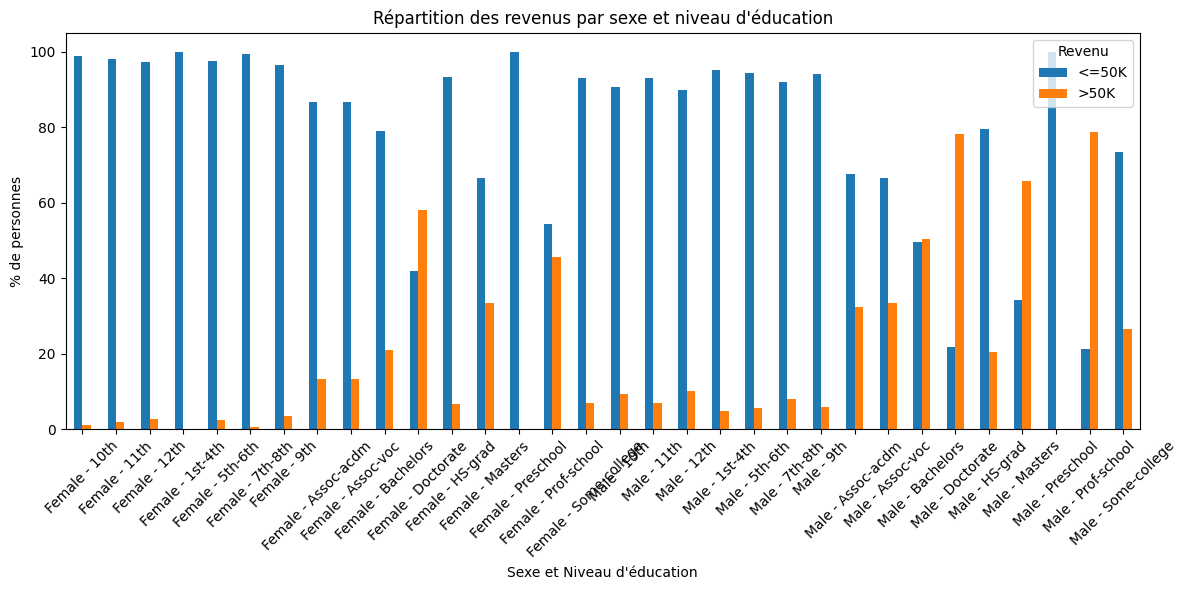

In [20]:
import matplotlib.pyplot as plt

# Tableau croisé dynamique : Sexe par niveau d'éducation et revenu
sex_education_income = pd.crosstab([df['sex'], df['education']], df['income'], normalize='index') * 100

# Affichage du tableau croisé dynamique
print(sex_education_income)

# Organiser les données pour avoir une séparation distincte entre homme/femme et revenu
sex_education_income = sex_education_income.reset_index()
sex_education_income['sex_education'] = sex_education_income['sex'] + ' - ' + sex_education_income['education']

# Tracer le graphique avec 4 couleurs distinctes
plt.figure(figsize=(14, 7))

# Définir les couleurs pour chaque catégorie
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']  # Homme <=50K, Homme >50K, Femme <=50K, Femme >50K

# Tracer le graphique à barres groupées avec 4 couleurs
sex_education_income[['<=50K', '>50K']].plot(kind='bar', stacked=False, color=colors, figsize=(12, 6))

# Ajouter les labels et le titre
plt.title('Répartition des revenus par sexe et niveau d\'éducation')
plt.ylabel('% de personnes')
plt.xlabel('Sexe et Niveau d\'éducation')
plt.xticks(range(len(sex_education_income['sex_education'])), sex_education_income['sex_education'], rotation=45)
plt.legend(title='Revenu', labels=['<=50K', '>50K'])
plt.tight_layout()
plt.show()


income                              <=50K       >50K
education    occupation                             
10th         ?                  98.039216   1.960784
             Adm-clerical      100.000000   0.000000
             Craft-repair       88.823529  11.176471
             Exec-managerial    75.000000  25.000000
             Farming-fishing    97.727273   2.272727
...                                   ...        ...
Some-college Prof-specialty     72.790698  27.209302
             Protective-serv    65.841584  34.158416
             Sales              78.790882  21.209118
             Tech-support       72.527473  27.472527
             Transport-moving   74.204947  25.795053

[217 rows x 2 columns]


<Figure size 1200x800 with 0 Axes>

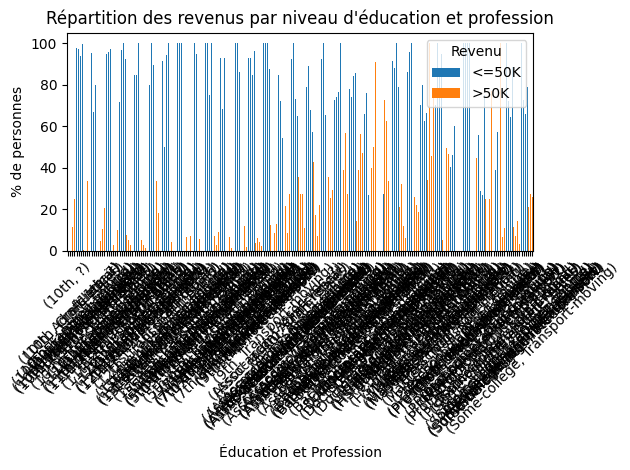

In [15]:
# Tableau croisé dynamique : Éducation par profession et revenu
education_occupation_income = pd.crosstab([df['education'], df['occupation']], df['income'], normalize='index') * 100

# Affichage du tableau croisé dynamique
print(education_occupation_income)

# Diagramme à barres groupées
plt.figure(figsize=(12, 8))
education_occupation_income.plot(kind='bar', stacked=False, color=['#1f77b4', '#ff7f0e'])
plt.title('Répartition des revenus par niveau d\'éducation et profession')
plt.ylabel('% de personnes')
plt.xlabel('Éducation et Profession')
plt.xticks(rotation=45)
plt.legend(title='Revenu', labels=['<=50K', '>50K'])
plt.tight_layout()
plt.show()
